# 📊 Project 2 — Bank Marketing Classification
*Portuguese Banking Institution*

---

## Phase 1 — Business Understanding


### Business Objective
The bank runs large-scale telemarketing campaigns to promote term deposits. These campaigns are expensive, requiring significant staff time and customer contact.  

The goal is to **improve the efficiency of marketing campaigns** by identifying which clients are most likely to subscribe to a term deposit.  

If successful:
- Fewer wasted calls and resources
- Higher conversion rates
- Improved customer satisfaction by reducing unwanted contact


### Data Science Objective
Translate the business need into a technical task:  

- Build a **binary classification model** that predicts whether a client will subscribe (`y = yes`) or not (`y = no`).  
- Compare at least two baseline models (Logistic Regression and Random Forest).  
- Optimize performance through hyperparameter tuning and imbalance handling.  
- Provide insights into which features (e.g., age, job, previous campaign outcome, economic indicators) influence the outcome most.  


### Success Criteria / KPIs
The project will be considered successful if the model:  
- Achieves meaningful lift over a naive baseline (predicting "no" for all clients).  
- Shows improved **Precision, Recall, F1-score, and ROC-AUC**, not just Accuracy.  
- Provides interpretable insights that stakeholders can act on.  

*Example*: A target Precision of >0.30 and Recall >0.40 for the positive class ("yes"), with ROC-AUC above 0.70.


### Stakeholders & Constraints
**Stakeholders:**
- Bank Marketing Department (campaign planners, analysts)
- Call center staff (implementing the campaigns)
- Bank executives (strategic planning and ROI evaluation)

**Constraints:**
- Time: project due in 2 weeks (student scope)
- Budget: limited compute, must use free/open-source tools (scikit-learn, imbalanced-learn)
- Data: fixed dataset from UCI, no additional data collection
- Risk tolerance: avoid false positives that waste resources, but also avoid missing too many likely customers


### Project Plan
- **Phase 1**: Business Understanding (define goals, success criteria) ✅  
- **Phase 2**: Data Understanding (EDA, data profiling, class imbalance analysis)  
- **Phase 3**: Data Preparation (encoding, scaling, missing values, leakage prevention)  
- **Phase 4**: Modeling (Logistic Regression, Random Forest, tuning, resampling)  
- **Phase 5**: Evaluation (compare models, check KPIs, review process)  
- **Phase 6**: Deployment (recommend workflow for stakeholders, monitoring plan)  

*Tools*: Visual Studio Code, Python, pandas, seaborn, matplotlib, scikit-learn, imbalanced-learn  
*Risks*: Data imbalance, overfitting, data leakage (notably from `duration` feature)


### Core Imports (used throughout the project)


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set default plotting style
sns.set_theme(style="whitegrid")


## Phase 2 — Data Understanding

### Dataset Selected
We will use **bank-additional-full.csv**, which contains **~41,188 rows** and **21 columns** (20 input features + 1 output label) (`y`).

This dataset is the enriched version of the UCI Bank Marketing dataset, including additional macroeconomic indicators (e.g., employment variation rate, consumer confidence index).  

**Citation**:  
[Moro et al., 2014] S. Moro, P. Cortez, and P. Rita. *A Data-Driven Approach to Predict the Success of Bank Telemarketing.* Decision Support Systems, 2014. DOI: [10.1016/j.dss.2014.03.001](http://dx.doi.org/10.1016/j.dss.2014.03.001)

---

### Dataset Dictionary — `bank-additional-full.csv`

#### 📂 Bank Client Data
- **age** (numeric): Client’s age  
- **job** (categorical): Type of job  
  *Values*: admin., blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed, unknown  
- **marital** (categorical): Marital status  
  *Values*: divorced, married, single, unknown  
- **education** (categorical): Education level  
  *Values*: basic.4y, basic.6y, basic.9y, high.school, illiterate, professional.course, university.degree, unknown  
- **default** (categorical): Has credit in default? (yes, no, unknown)  
- **housing** (categorical): Has housing loan? (yes, no, unknown)  
- **loan** (categorical): Has personal loan? (yes, no, unknown)  

---

#### ☎️ Last Contact Info
- **contact** (categorical): Contact type (cellular, telephone)  
- **month** (categorical): Last contact month (jan … dec)  
- **day_of_week** (categorical): Last contact day (mon … fri)  
- **duration** (numeric): Last contact duration (seconds)  
  ⚠️ *Note*: Highly predictive, but not realistic for modeling since it’s only known after the call. Usually excluded from training.  

---

#### 📊 Campaign Data
- **campaign** (numeric): Number of contacts during this campaign  
- **pdays** (numeric): Days since last contact from a previous campaign (999 = not previously contacted)  
- **previous** (numeric): Number of contacts before this campaign  
- **poutcome** (categorical): Outcome of previous campaign (failure, nonexistent, success)  

---

#### 🌍 Social & Economic Context
- **emp.var.rate** (numeric): Employment variation rate (quarterly)  
- **cons.price.idx** (numeric): Consumer price index (monthly)  
- **cons.conf.idx** (numeric): Consumer confidence index (monthly)  
- **euribor3m** (numeric): Euribor 3-month rate (daily)  
- **nr.employed** (numeric): Number of employees (quarterly)  

---

#### 🎯 Target Variable
- **y** (binary categorical): Has the client subscribed to a term deposit?  
  *Values*: yes, no


In [45]:
# Load dataset (update path if needed)
df = pd.read_csv("./data/bank-additional-full.csv", sep=";")

# Shape of the dataset (rows, columns)
df.shape

(41188, 21)

In [46]:
# Quick look, print first 5 rows
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# Basic dataset info: lists each column, its data type, and non-null counts
df.info() 

# Summary statistics: lists each column with count, mean, std, min, 25%, 50%, 75%, max for numeric columns
df.describe(include="all").transpose().head(20)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,41188.0,NaN,NaN,NaN,40.02406,10.42125,17.0,32.0,38.0,47.0,98.0
job,41188,12,admin.,10422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,41188,4,married,24928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,41188,8,university.degree,12168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,41188,3,no,32588,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,41188,3,yes,21576,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,41188,3,no,33950,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,41188,2,cellular,26144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,41188,10,may,13769,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,41188,5,thu,8623,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Column Profiling (Summary)

| Column          | Type        | Units      | Min   | Max   | # Unique | % Missing / Unknown | Notes |
|-----------------|------------|-----------|-------|-------|----------|---------------------|-------|
| age             | Numeric    | years     |       |       |          |                     |       |
| job             | Categorical| n/a       |       |       |          |                     |       |
| marital         | Categorical| n/a       |       |       |          |                     |       |
| education       | Categorical| n/a       |       |       |          |                     |       |
| default         | Categorical| yes/no    |       |       |          |                     |       |
| 
| …               | …          | …         | …     | …     | …        | …                   | …     |
| y (target)      | Binary     | yes/no    |       |       |          |                     |       |




In [75]:
# Column profiling helper function
def profile_columns(df, target_col = "y", include_target = False, missing_threshold = 10, styled = True):
  
  """ 
  Profiles columns in the dataframe, summarizing type, unique values, min/max (for numeric), and % missing/unknown.
  Parameters:
  - df: pandas DataFrame to profile
  - target_col: Name of the target column to optionally exclude from profiling
  - include_target: Whether to include the target column in the profile
  - styled: whether to return a styled DataFrame (default=True)
  Returns:
  - profile: DataFrame summarizing each column's characteristics
  """

  def simplify_dtype(dtype):
    return "Numeric" if pd.api.types.is_numeric_dtype(dtype) else "Categorical"
  
  # Optionally drop target column from profiling
  data = df.drop(columns = [target_col]) if not include_target and target_col in df.columns else df

  # Build profile DataFrame
  profile = pd.DataFrame({ "Type": data.dtypes.apply(simplify_dtype)
                          ,"NUnique": data.nunique()
                          ,"Min": data.min(numeric_only = True)
                          ,"Max": data.max(numeric_only = True)
                          ,"% Missing/Unknown": (data.isin(["unknown"]).sum() / len(data) * 100).round(2) })
  
  # Add flag column for potential issues
  flags = []
  #for col, row in profile.iterrows():
  for _, row in profile.iterrows():
    flag = ""

    # Flag high missing/unknown
    if row["% Missing/Unknown"] > missing_threshold:
      flag += "⚠️ High Missing/Unknown "

    # Flag Categorical with too many unique values
    if row["Type"] == "Categorical" and row["NUnique"] > 20:
      flag += "⚠️ High Cardinality "

    # Flag Numeric with too few unique values, only a few unique values (may be categorical instead)
    if row["Type"] == "Numeric" and row["NUnique"] < 10:
      flag += "⚠️ Low Variability "
    
    flags.append(flag.strip())

  profile["Flags"] = flags
  profile = profile.reset_index().rename(columns={"index": "Column"})

  # Optionally return styled DataFrame for better display in Jupyter
  if styled:        
    # Compute 1-based column index of "Flags"
    flags_pos  = profile.columns.get_loc("Flags") + 1
    column_pos = profile.columns.get_loc("Type")  # Column names appear in index by default, but Type col is first real col
    #column_pos = profile.columns.get_loc("Column") + 1
    #print(f"Flags column position: {flags_pos}, Column position: {column_pos}")

    # Style: left-align the Flags column (header + cells), keep rows on one line
    styled_profile = ( 
      profile.style
             .set_properties(**{"white-space": "nowrap"})  # keep each row on one line
             .set_table_styles([ 
                # Left-align 'Flags' column (header + body)
                {"selector": f"thead th:nth-child({flags_pos+1})", "props": [("text-align", "center")]},
                {"selector": f"tbody td:nth-child({flags_pos+1})", "props": [("text-align", "left")]},
                                            
                # Left-align 'Column' column (header + body)
                {"selector": f"thead th:nth-child({column_pos+1})", "props": [("text-align", "center")]},
                {"selector": f"tbody td:nth-child({column_pos+1})", "props": [("text-align", "left")]}
              ], overwrite = False )
    )
    return styled_profile
  else:
    return profile

pd.set_option('display.max_columns', None)            # Show all columns in the profile output
pd.set_option('display.width', 1000)                  # Set display width for better readability
pd.set_option('display.colheader_justify', 'center')  # Center justify column headers

# IMPORTANT: do NOT use print()
profile = profile_columns(df, styled = True)

#print(profile)
#display(profile)
profile


,Column,Type,NUnique,Min,Max,% Missing/Unknown,Flags
0,age,Numeric,78,17.000000,98.000000,0.000000,
1,campaign,Numeric,42,1.000000,56.000000,0.000000,
2,cons.conf.idx,Numeric,26,-50.800000,-26.900000,0.000000,
3,cons.price.idx,Numeric,26,92.201000,94.767000,0.000000,
4,contact,Categorical,2,nan,nan,0.000000,
5,day_of_week,Categorical,5,nan,nan,0.000000,
6,default,Categorical,3,nan,nan,20.870000,⚠️ High Missing/Unknown
7,duration,Numeric,1544,0.000000,4918.000000,0.000000,
8,education,Categorical,8,nan,nan,4.200000,
9,emp.var.rate,Numeric,10,-3.400000,1.400000,0.000000,


In [49]:
# Count 'unknown' entries (used in this dataset instead of NaN)
df.isin(["unknown"]).sum().sort_values(ascending=False).head(10)


default        8597
education      1731
housing         990
loan            990
job             330
marital          80
age               0
contact           0
month             0
day_of_week       0
dtype: int64

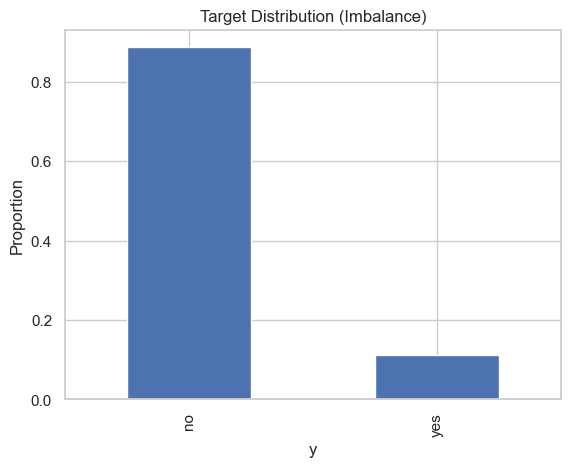

In [50]:
# Target distribution (yes/no)
df['y'].value_counts(normalize=True).plot(kind='bar', title='Target Distribution (Imbalance)')
plt.ylabel("Proportion")
plt.show()


### Initial Observations
- Dataset has ~41k rows and 21 columns (20 features + target).
- No true NaNs, but "unknown" acts as missing for some categorical features.
- Strong class imbalance: majority of clients did **not** subscribe ("no").


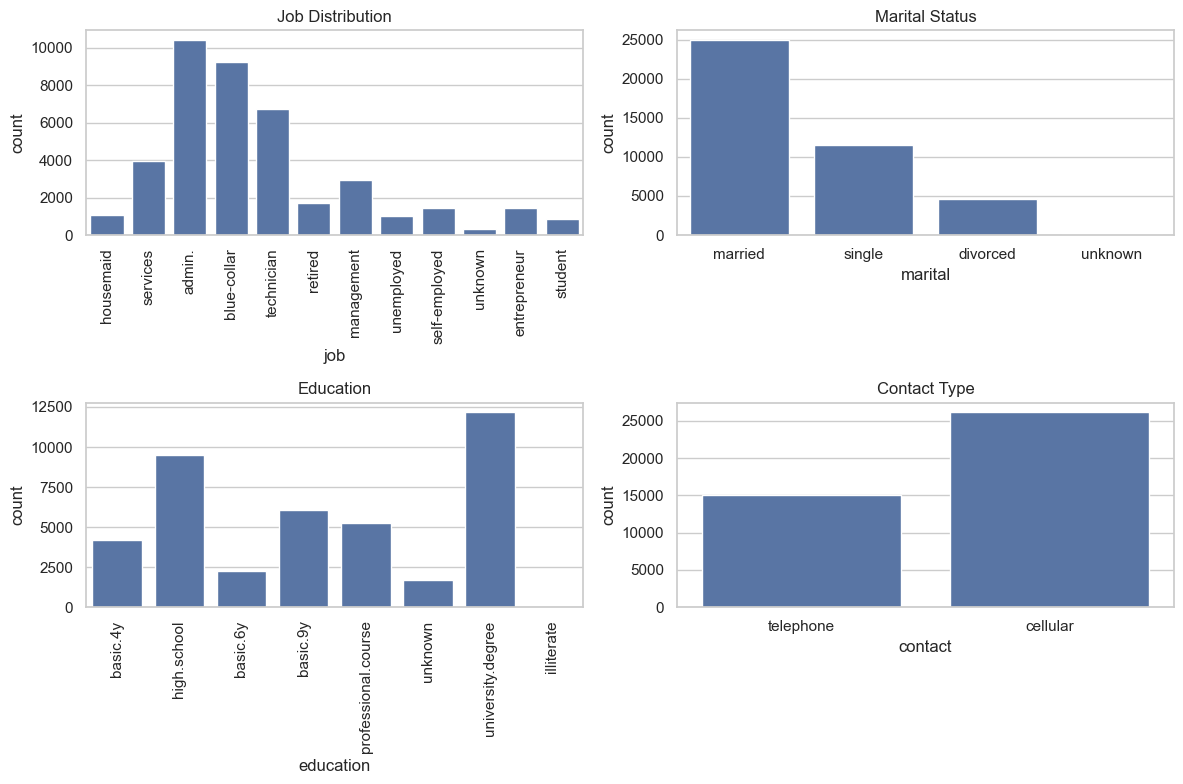

In [51]:
# Countplots for selected categorical features
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.countplot(data=df, x="job", ax=axes[0,0])
axes[0,0].set_title("Job Distribution")
axes[0,0].tick_params(axis='x', rotation=90)

sns.countplot(data=df, x="marital", ax=axes[0,1])
axes[0,1].set_title("Marital Status")

sns.countplot(data=df, x="education", ax=axes[1,0])
axes[1,0].set_title("Education")
axes[1,0].tick_params(axis='x', rotation=90)

sns.countplot(data=df, x="contact", ax=axes[1,1])
axes[1,1].set_title("Contact Type")

plt.tight_layout()
plt.show()


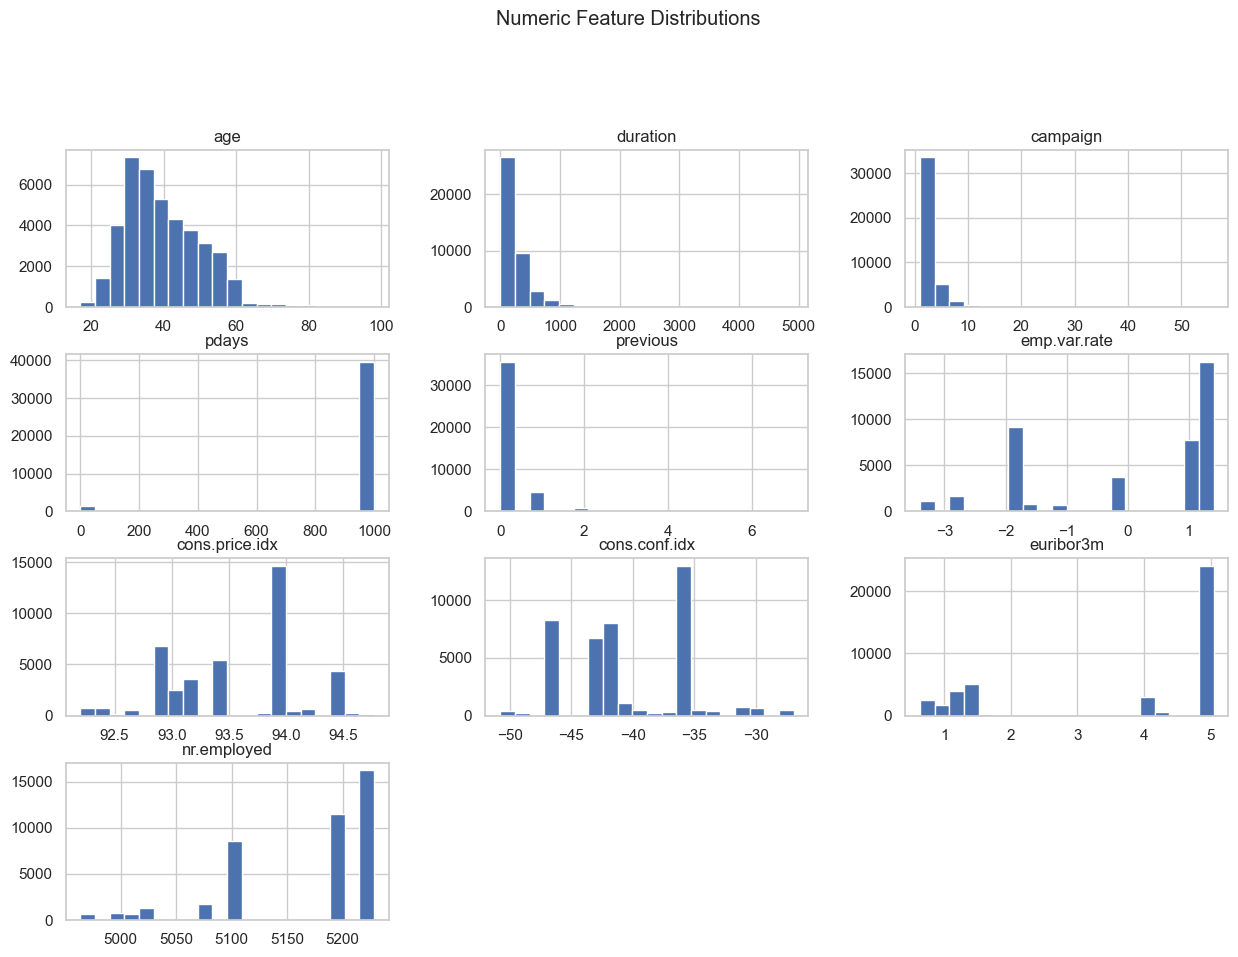

In [52]:
# Histograms for numeric features
num_features = df.select_dtypes(exclude="object").columns

df[num_features].hist(bins=20, figsize=(15, 10))
plt.suptitle("Numeric Feature Distributions", y=1.02)
plt.show()


### Data Quality Checks
- **Duplicates**: check if duplicate rows exist.
- **Outliers**: inspect numeric variables (e.g., `campaign`, `pdays`).
- **Consistency**: categorical values are clean, but many "unknown" entries.

Next, we will decide which features to keep/drop and how to handle missing/unknowns.


In [53]:
# Check for duplicate rows
df.duplicated().sum()

# Quick look at unusual values
df['campaign'].describe(), df['pdays'].describe()


(count    41188.000000
 mean         2.567593
 std          2.770014
 min          1.000000
 25%          1.000000
 50%          2.000000
 75%          3.000000
 max         56.000000
 Name: campaign, dtype: float64,
 count    41188.000000
 mean       962.475454
 std        186.910907
 min          0.000000
 25%        999.000000
 50%        999.000000
 75%        999.000000
 max        999.000000
 Name: pdays, dtype: float64)

In [54]:

# ========================================================================================= #


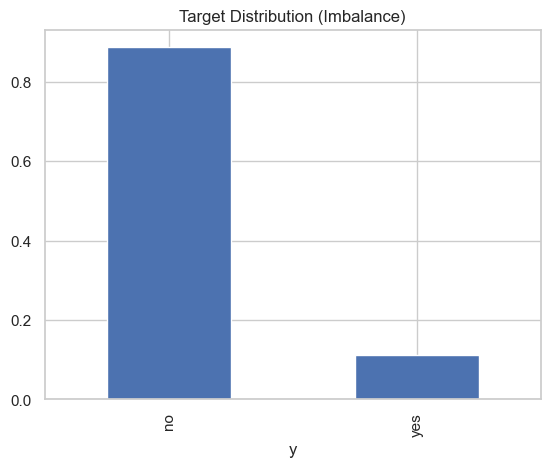

In [55]:
# Target distribution
df['y'].value_counts(normalize=True).plot(kind='bar', title='Target Distribution (Imbalance)')
plt.show()


### Notes:
- Document dataset size, number of features.
- Record any missing values (in this dataset, 'unknown' often encodes missingness).
- Note class imbalance in `y`.


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separate features and target
X = df.drop("y", axis=1)
y = df["y"].map({"yes":1, "no":0})  # convert to binary

# Identify categorical vs numeric
cat_features = X.select_dtypes(include="object").columns
num_features = X.select_dtypes(exclude="object").columns

cat_features, num_features


(Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'], dtype='object'),
 Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'], dtype='object'))

In [57]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
    ]
)


### Data Cleaning Decisions
- Treat "unknown" as missing and encode as its own category.
- Exclude **`duration`** from modeling (data leakage) — but keep for EDA/benchmarking.
- Scale numeric features, one-hot encode categorical features.


In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Logistic Regression with class_weight to handle imbalance
log_reg = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(max_iter=1000, class_weight="balanced"))
])

# Random Forest baseline
rf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(random_state=42))
])

models = {"Logistic Regression": log_reg, "Random Forest": rf}



Logistic Regression
              precision    recall  f1-score   support

           0       0.99      0.86      0.92     10965
           1       0.45      0.90      0.60      1392

    accuracy                           0.86     12357
   macro avg       0.72      0.88      0.76     12357
weighted avg       0.92      0.86      0.88     12357

ROC-AUC: 0.939619662353046


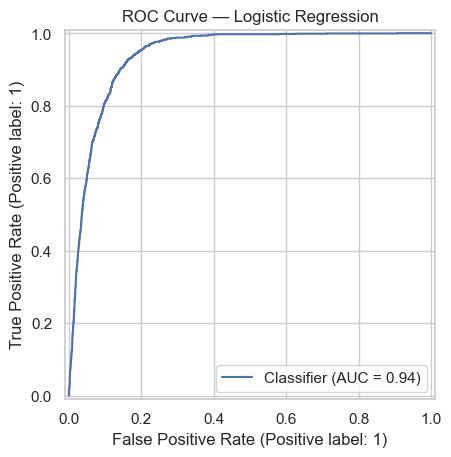


Random Forest
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10965
           1       0.69      0.45      0.54      1392

    accuracy                           0.91     12357
   macro avg       0.81      0.71      0.75     12357
weighted avg       0.91      0.91      0.91     12357

ROC-AUC: 0.9407453705887595


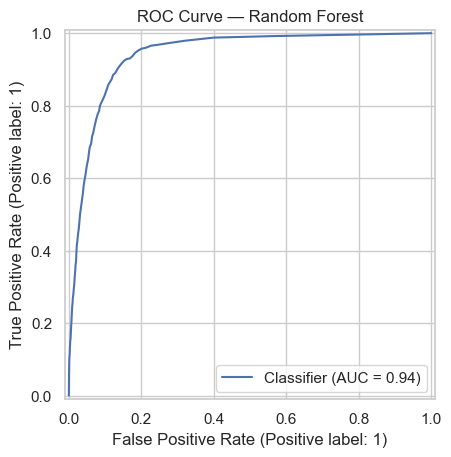

In [59]:
# Train & evaluate models
for name, model in models.items():
    print(f"\n{name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]

    print(classification_report(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_proba))
    RocCurveDisplay.from_predictions(y_test, y_proba)
    plt.title(f"ROC Curve — {name}")
    plt.show()


### Observations
- Compare performance of Logistic Regression vs Random Forest.
- Discuss tradeoffs between interpretability (LogReg) and predictive power (RF).


In [60]:
from sklearn.model_selection import GridSearchCV

# Example: tune Random Forest
param_grid = {
    "model__n_estimators": [100, 300],
    "model__max_depth": [None, 10, 20],
    "model__min_samples_split": [2, 5]
}

grid_search = GridSearchCV(
    rf, param_grid, cv=3, scoring="f1", n_jobs=-1
)
grid_search.fit(X_train, y_train)

print("Best params:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best params: {'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 300}
Best score: 0.5191465740167976


### Next Steps
- Test resampling strategies (SMOTE, undersampling).
- Use tuned hyperparameters for final model.
- Re-run metrics and compare.


### Final Summary
- **Model Chosen**: (e.g., Random Forest after tuning).
- **Preprocessing**: One-hot encoding, scaling, excluded `duration`.
- **Class Imbalance**: Addressed with class weights / resampling.
- **Performance**: (insert metrics here).
- **Business Impact**: Bank can better target customers, improve campaign efficiency.
